In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
attrs = []
target = []
for xls in os.listdir('sample_data/'):
    data = pd.read_excel('sample_data/'+xls, header=None)

    output = data.iloc[-1,0]
    output = np.float32(output.split(':')[-1])
    data = data.iloc[0:-1]
    attrs.append(np.array(data))
    target.append(np.float32(output))

attrs = np.array(attrs)
target = np.array(target)

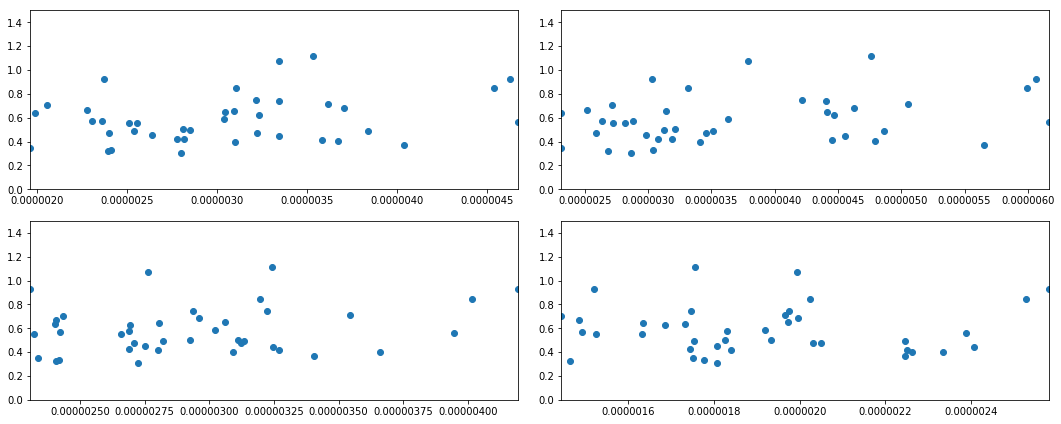

In [16]:
plt.figure(figsize=(15, 6))
for i in range(4):
    plt.subplot(2,2,i+1)
    x = np.mean(attrs[:,:,i], axis=1)
    plt.scatter(x, target)
    plt.axis([ min(x), max(x), 0, 1.5])
plt.tight_layout()

In [77]:
min = np.min(attrs, axis=None)
max = np.max(attrs, axis=None)

print('min = ', min)
print('max = ', max)

min =  1.3171675787247089e-09
max =  0.000854607292409486


In [78]:
scaled_attrs = (attrs-min)/(max-min) + 0.01

In [7]:
# for xls in os.listdir('sample_data/'):
#     data = pd.read_excel('sample_data/'+xls, header=None)

#     output = data.iloc[-1,0]
#     output = np.float32(output.split(':')[-1])
#     data.iloc[-1,0] = 0
#     data = (data-min)/(max-min) + 0.01
#     data.iloc[-1,0] = output
#     file_name = xls.split('.')[0]+'.csv'
#     data.to_csv('preprocessed_data/' + file_name)

(array([1., 0., 0., 0., 0., 0., 2., 0., 0., 2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

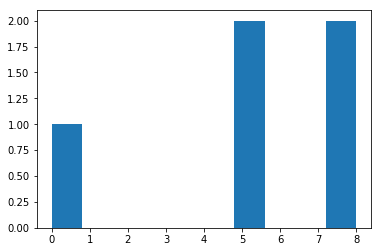

In [16]:
a = attrs[0,:,0]
# plt.hist(a[0:400],bins=5)
plt.hist([0,5,5,8,9], )

# 8 8 JICHUAN

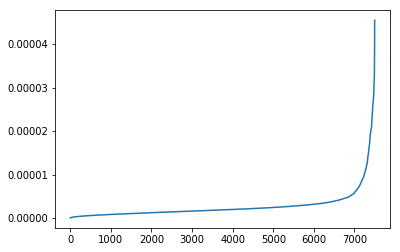

In [56]:
a = attrs[3,:,2]
b = a[a<0.00005]
plt.plot(np.sort(b))

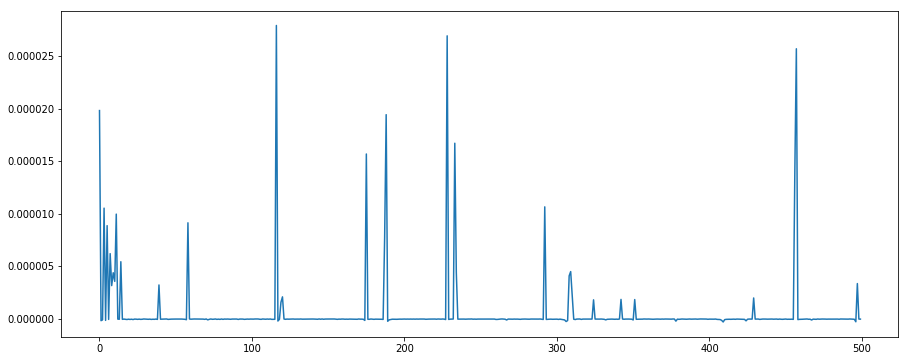

In [75]:
index = np.arange(0,7500,5)
b = attrs[0,:,3]
b = [ a[i] if foo else -0.01*a[i] for i,foo in enumerate(b>0.000003)]
plt.figure(figsize=[15,6])
plt.plot(b[0:500])

In [17]:
index = np.arange(0,7500,5)
b = scaled_attrs[0,:,2] 
b = [ b[i] if foo else -0.01*b[i] for i,foo in enumerate(b>0.015)]
plt.figure(figsize=[15,6])
plt.plot(b[0:500])

NameError: name 'scaled_attrs' is not defined

# 1.18 vs 0.36

In [44]:
selection = np.logical_or(target == min(target), target == max(target))
cattrs = attrs[selection]
ctargets = target[selection]

[2.7e-06, 3.6e-06, 0, 1.2]

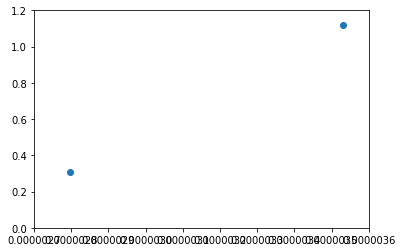

In [53]:
plt.scatter(cattrs[:,:,0].mean(axis=1), ctargets)
plt.axis([2.7e-06, 3.6e-06, 0, 1.2])

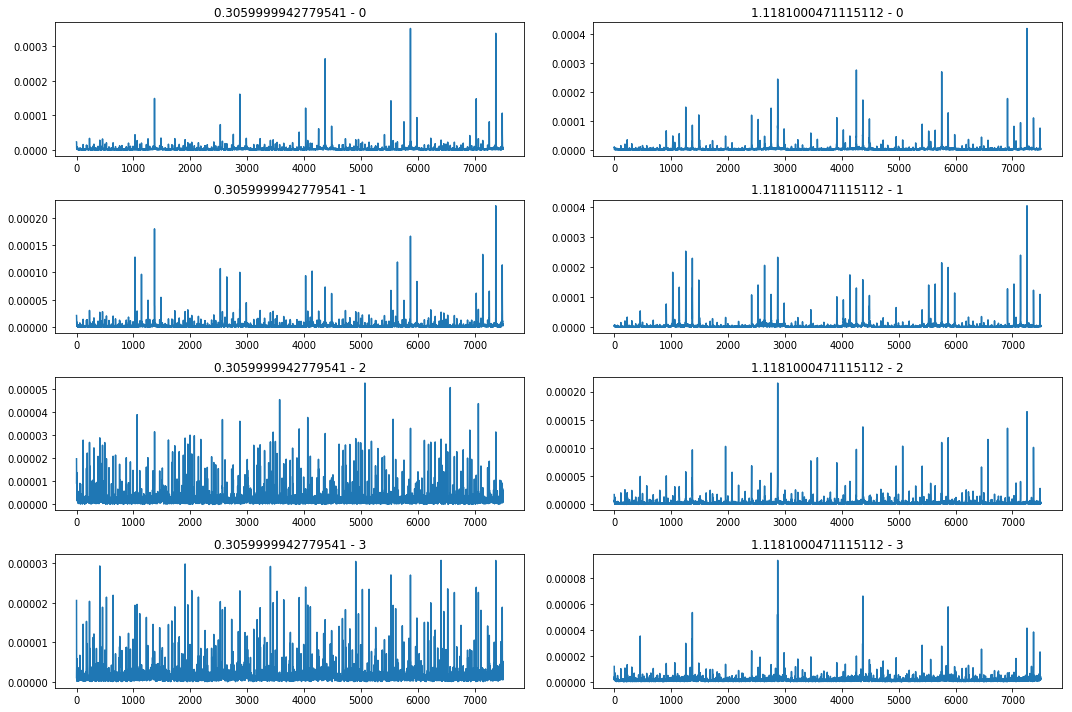

In [61]:
plt.figure(figsize=[15,10])
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(cattrs[i%2,:,i//2])
    plt.title("{} - {}".format(ctargets[i%2], i//2))
plt.tight_layout()